# Decision tree for classification
> A Summary of lecture "Machine Learning with Tree-Based Models in Python
", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning]
- image: images/decision-boundary.png

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Decision tree for classification
- Classification-tree
    - Sequence of if-else questions about individual features.
    - **Objective**: infer class labels
    - Able to caputre non-linear relationships between features and labels
    - Don't require feature scaling(e.g. Standardization)
- Decision Regions
    - Decision region: region in the feature space where all instances are assigned to one class label
    - Decision Boundary: surface separating different decision regions
![decision region](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/decision_boundary.png?raw=1)

### Train your first classification tree
In this exercise you'll work with the [Wisconsin Breast Cancer Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (```radius_mean```) and its mean number of concave points (```concave points_mean```).

### Preprocess

In [ ]:
wbc = pd.read_csv('./dataset/wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
X = wbc[['radius_mean', 'concave points_mean']]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 0 1 0]


### Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


### Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

#### Helper function

In [ ]:
from mlxtend.plotting import plot_decision_regions

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

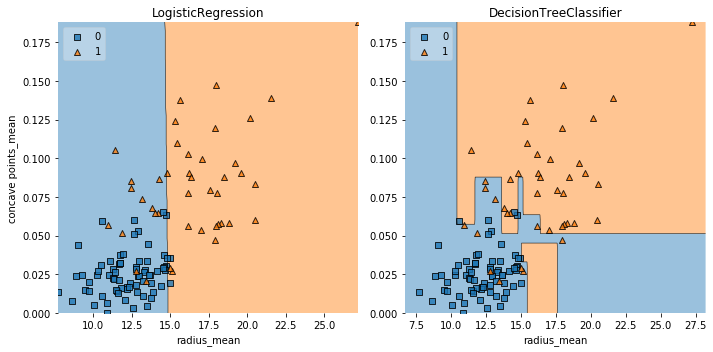

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_labeled_decision_regions(X_test, y_test, clfs)

## Classification tree Learning
- Building Blocks of a Decision-Tree
    - Decision-Tree: data structure consisting of a hierarchy of nodes
    - Node: question or prediction
    - Three kinds of nodes
        - **Root**: no parent node, question giving rise to two children nodes.
        - **Internal node**: one parent node, question giving rise to two children nodes.
        - **Leaf**: one parent node, no children nodes --> prediction.
- Information Gain (IG)
![information gain](https://github.com/goodboychan/chans_jupyter/blob/master/_notebooks/image/ig.png?raw=1)
$$ IG(\underbrace{f}_{\text{feature}}, \underbrace{sp}_{\text{split-point}} ) = I(\text{parent}) - \big( \frac{N_{\text{left}}}{N}I(\text{left}) + \frac{N_{\text{right}}}{N}I(\text{right})  \big) $$
    - Criteria to measure the impurity of a note $I(\text{node})$:
        - gini index
        - entropy
        - etc...
- Classification-Tree Learning
    - Nodes are grown recursively.
    - At each node, split the data based on:
        - feature $f$ and split-point $sp$ to maximize $IG(\text{node})$.
        - If $IG(\text{node}) = 0$, declare the node a leaf

### Using entropy as a criterion
In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named ```dt_gini```. The tree ```dt_gini``` was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword ```'gini'```.

In [ ]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print("Accuracy achieved by using entropy: ", accuracy_entropy)

# Print accuracy_gini
print("Accuracy achieved by using gini: ", accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using gini:  0.8859649122807017


## Decision tree for regression
- Information Criterion for Regression Tree
$$ I(\text{node}) = \underbrace{\text{MSE}(\text{node})}_{\text{mean-squared-error}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}} \big(y^{(i)} - \hat{y}_{\text{node}}  \big)^2 $$
$$ \underbrace{\hat{y}_{\text{node}}}_{\text{mean-target-value}} = \dfrac{1}{N_{\text{node}}} \sum_{i \in \text{node}}y^{(i)}$$
- Prediction
$$ \hat{y}_{\text{pred}}(\text{leaf}) = \dfrac{1}{N_{\text{leaf}}} \sum_{i \in \text{leaf}} y^{(i)}$$

In [ ]:
#LOGISTIC REGRESSION for HCV 

#Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HCV.csv.csv to HCV.csv (1).csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/HCV.csv.csv', index_col=0)
df.head()

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category,Unnamed: 13
Age,,,,,,,,,,,,,
32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor,NaN
32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor,NaN
32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor,NaN
32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor,NaN
32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor,NaN


In [ ]:
#Category is dependent variable 

#Age	Sex	ALB	ALP	ALT	AST	BIL	CHE	CHOL	CREA	GGT	PRO are independent variable

In [ ]:

# # Drop column of index using DataFrame.iloc[] and drop() methods.
# df2 = df.drop(df.iloc[:, 0:1],axis = 1)
# print(df2)                      
# df2.shape

In [ ]:
df.nunique()

Sex              2
ALB            189
ALP            414
ALT            341
AST            297
BIL            188
CHE            407
CHOL           313
CREA           117
GGT            358
PROT           198
Category         5
Unnamed: 13      0
dtype: int64

In [ ]:
#some null values are shown here

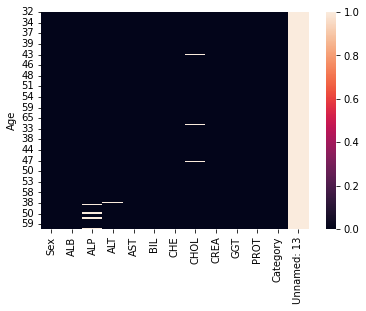

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.drop(['Unnamed: 13'],axis=1,inplace=True)

In [ ]:
df.fillna(0, inplace = True)


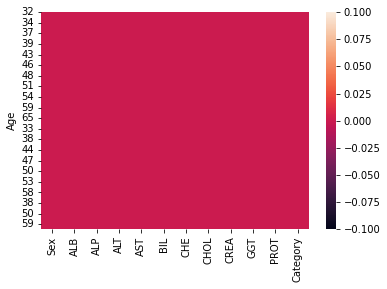

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
#According to heat map - ALP CHOL AND PROT has some null values hence should be replaced by any values

In [ ]:
df.head()

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
Age,,,,,,,,,,,,
32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor


In [ ]:
labelencoder = LabelEncoder()
new_df=df
new_df['Category']=labelencoder.fit_transform(df['Category'])
new_df['Sex']=labelencoder.fit_transform(df['Sex'])

In [ ]:
new_df.head(2)

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
Age,,,,,,,,,,,,
32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0


In [ ]:
x= new_df.iloc[:, 1:]
print(x)

      ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  PROT  \
Age                                                                     
32   38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1  69.0   
32   38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6  76.5   
32   46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2  79.3   
32   43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8  75.7   
32   39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9  68.7   
..    ...    ...    ...    ...   ...    ...   ...    ...    ...   ...   
62   32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9  68.5   
64   24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9  71.3   
64   29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2  82.0   
46   33.0    0.0   39.0   62.0  20.0   3.56  4.20   52.0   50.0  71.0   
59   36.0    0.0  100.0   80.0  12.0   9.07  5.30   67.0   34.0  68.0   

     Category  
Age            
32          0  
32

In [ ]:
y= new_df.iloc[:, 0]
print(y)

Age
32    1
32    1
32    1
32    1
32    1
     ..
62    0
64    0
64    0
46    0
59    0
Name: Sex, Length: 615, dtype: int64


In [ ]:
#Extracting Independent and dependent Variable  
#all rows from  1 column to last,  except column 0 that is Category 
#all rows from  0 column ie Category
x= new_df.iloc[:, 1:].values  
y= new_df.iloc[:, 0].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[34, 29],
       [15, 76]])

In [ ]:
print('Accuracy of logistic regression classifier on test set: {}'.format(classifier.score(x_test, y_test)))

print('Accuracy of logistic regression classifier on test set: {}'.format(classifier.score(x_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.54      0.61        63
           1       0.72      0.84      0.78        91

    accuracy                           0.71       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [ ]:
tested_x = classifier.predict(x_test)

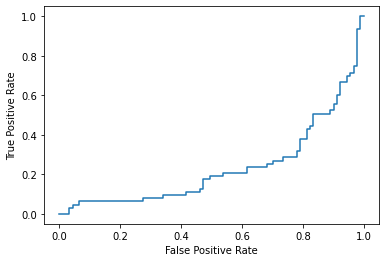

In [ ]:
from sklearn import metrics
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)

#create ROC curve
plt.plot(fpr,tpr )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision tree for HCV dataset


Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [ ]:
# importing the sklearn library
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.

In [ ]:
# getting the x(dataset excluding the class attribute) and y(class attribute) dataset from class data set
df.drop(df.iloc[:, 0:1],axis = 1)
xdf=df
t = xdf.iloc[:, 1:].values
v = new_df.iloc[:, 0].values

print(v)

t_train, t_test, v_train, v_test= train_test_split(t, v, test_size= 0.25)


st_x= StandardScaler()    
t_train= st_x.fit_transform(t_train)    
t_test= st_x.fit_transform(t_test)

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(t_train, v_train)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
v_pred_gini = clf_gini.predict(t_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(v_test, v_pred_gini)))

v_pred_train_gini = clf_gini.predict(t_train)

v_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(v_train, v_pred_train_gini)))


Model accuracy score with criterion gini index: 0.7922
Training-set accuracy score: 0.8113


In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(t_train, v_train)) 

Logistic regression for my data

In [ ]:
from google.colab import files
upload = files.upload()

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/student-mat.csv', delimiter=";")
df.head()

In [ ]:
#Drop the columns with the non numerical values.
num_df=df
num_df.drop(df.iloc[1: , :],axis = 1)
print(num_df)   
# num_df =df1.drop(['Grid Ref: Easting', 'Grid Ref: Northing','Reference Number','Accident Date','Time (24hr)', '1st Road Class','Casualty Class', '1st Road Class & No','Vehicle Number','Local Authority'], axis=1)
num_df.columns



In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

cols = ['address','famsize','school', 'sex','Mjob','Fjob','schoolsup','famsup','paid','Pstatus','guardian','reason','activities','nursery','higher','internet','romantic']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
#x= num_df.iloc[:, 0:].values y= num_df.iloc[:, 0].values  

x= num_df.iloc[:, 1:32].values  
y= num_df.iloc[:, 0].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
tested_x = classifier.predict(x_test)

In [ ]:
from sklearn import metrics
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import pandas as pd

df=pd.read_csv("/content/student-mat.csv",delimiter=';')


> Data Description







```#Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)
```



**Converting String data to int using label encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

cols = ['address','famsize','school', 'sex','Mjob','Fjob','schoolsup','famsup','paid','Pstatus','guardian','reason','activities','nursery','higher','internet','romantic']

**Label Encoder**

In [ ]:
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

**Info of data after conversion**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


**Rename function**

In [ ]:
df.rename(columns = {'famsize':'Fsize'}, inplace = True)   

**total null items**

In [ ]:
counting=df.isnull().count()

**Total COlumn and its names**

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'Fsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

**Shape**

In [ ]:
df.shape

(395, 33)

Dropping all null item and making it inplace =True(premanentely )

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,school,sex,age,address,Fsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
counting

school        395
sex           395
age           395
address       395
Fsize         395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [ ]:
df.shape

(395, 33)

In [ ]:
df.head(2)

,school,sex,age,address,Fsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6


In [ ]:
df.tail(2)

,school,sex,age,address,Fsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10
394,1,1,19,1,1,1,1,1,2,0,...,3,2,3,3,3,5,5,8,9,9


**Correlation**

In [ ]:
corr = df.corr()
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='binary')

,school,sex,age,address,Fsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,-0.090010,0.011109,0.242308,-0.090681,0.059804,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,-0.095867,-0.071343,0.059722,-0.306268,0.044436,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,-0.015337,0.290485,0.070641,-0.004140,0.243665,-0.251811,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,-0.047891,-0.044512,-0.328096,-0.020912,-0.078578,0.024712,0.023903,0.052800,-0.051360,0.059589,0.042854,0.216842,0.005257,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
Fsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,-0.019212,-0.002718,0.063493,-0.073595,-0.015769,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,-0.003553,-0.108715,0.028265,0.024294,-0.003339,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,0.117653,-0.023918,-0.171639,0.064944,-0.236680,-0.036029,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,0.043099,-0.133644,-0.158194,-0.009175,-0.250408,0.037530,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,0.022022,0.014787,-0.109752,-0.023097,-0.073377,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,-0.027688,-0.080511,0.055878,-0.076817,-0.008275,-0.011657,-0.030159,-0.040435,0.032391,-0.030812,-0.045250,0.035777,-0.000583,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


**conclusions from corr()**

---

It is found that scoring good in anyone of the exam will result in good marks in all exams
exams:G1,G2,G3

---


Father education and mother education is slightly positively correlated

---

if the person drinks during weekend there are chances that he might drink everyday


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['school']=labelencoder.fit_transform(df['school'])
df.head(1)

,school,sex,age,address,Fsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6


In [ ]:
df.skew(axis = 0, skipna = True)

school        2.400519
sex           0.106886
age           0.466270
address      -1.337481
Fsize         0.936623
Pstatus      -2.607984
Medu         -0.318381
Fedu         -0.031672
Mjob         -0.335188
Fjob         -0.362303
reason        0.409568
guardian     -0.111546
traveltime    1.607029
studytime     0.632142
failures      2.387026
schoolsup     2.220534
famsup       -0.464291
paid          0.168315
activities   -0.035584
nursery      -1.466570
higher       -4.114829
internet     -1.791595
romantic      0.705766
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          2.190762
Walc          0.611960
health       -0.494604
absences      3.671579
G1            0.240613
G2           -0.431645
G3           -0.732672
dtype: float64

In [ ]:
#function which return return of min-max eq
def norm(item):
	return (item - item.min())/(item.max() - item.min())
#apply norm function to each item in dataframe
df = df.apply(norm)
df

,school,sex,age,address,Fsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789,0.30
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158,0.30
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053,0.50
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842,0.75
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.714286,1.0,1.0,0.0,0.50,0.50,0.75,0.75,...,1.00,1.00,0.75,0.75,1.00,0.75,0.146667,0.3750,0.473684,0.45
391,1.0,1.0,0.285714,1.0,1.0,1.0,0.75,0.25,0.75,0.75,...,0.25,0.75,1.00,0.50,0.75,0.25,0.040000,0.6875,0.842105,0.80
392,1.0,1.0,0.857143,0.0,0.0,1.0,0.25,0.25,0.50,0.50,...,1.00,1.00,0.50,0.50,0.50,0.50,0.040000,0.4375,0.421053,0.35
393,1.0,1.0,0.428571,0.0,1.0,1.0,0.75,0.50,0.75,0.50,...,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579,0.50


G1 

**School reports**

**grouby functions**


---

grouping by schools 


---


'GP' - Gabriel Pereira 'MS' - Mousinho da Silveira


G1 G2 G3 are the grade exam conducted at two schools and we are obtaining the mean median and min values for those 

# **COMPARING THE SCHOOLS and GRADES **

In [ ]:
g1_school=df[['G1','G2','G3']].groupby(df['school']).mean()
g1_school_max=df[['G1','G2','G3']].groupby(df['school']).max()
g1_school_min=df[['G1','G2','G3']].groupby(df['school']).min()

In [ ]:
print("Average:\n\n{} \n\nMAX\n\n{} \n\nMIN\n\n{}".format(g1_school,g1_school_max,g1_school_min))

Average:

              G1        G2        G3
school                              
0.0     0.496239  0.567486  0.524499
1.0     0.479620  0.536613  0.492391 

MAX

         G1        G2    G3
school                     
0.0     1.0  1.000000  1.00
1.0     1.0  0.947368  0.95 

MIN

            G1        G2   G3
school                       
0.0     0.0000  0.000000  0.0
1.0     0.1875  0.263158  0.0


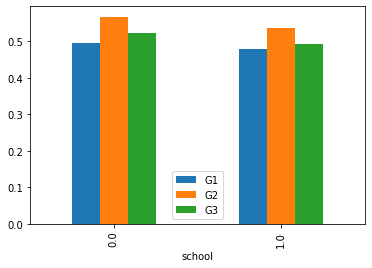

In [ ]:
g1_school=df[['G1','G2','G3']].groupby(df['school']).mean().plot(kind='bar')

G2 every school has high marks 

---


G1 is the lowest 

school 0 has high performance than school 1

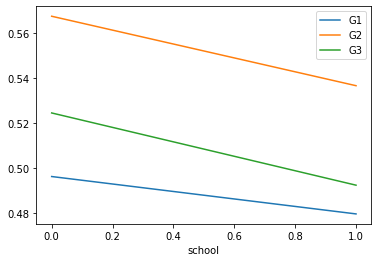

In [ ]:
g1_school=df[['G1','G2','G3']].groupby(df['school']).mean().plot(kind='line')

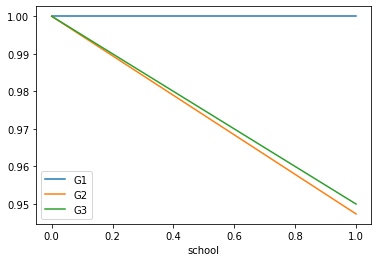

In [ ]:
g1_school=df[['G1','G2','G3']].groupby(df['school']).max().plot()

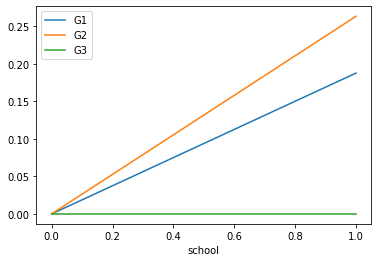

In [ ]:
g1_school=df[['G1','G2','G3']].groupby(df['school']).min().plot()

**Five number summary**
G3 has the most extremes 


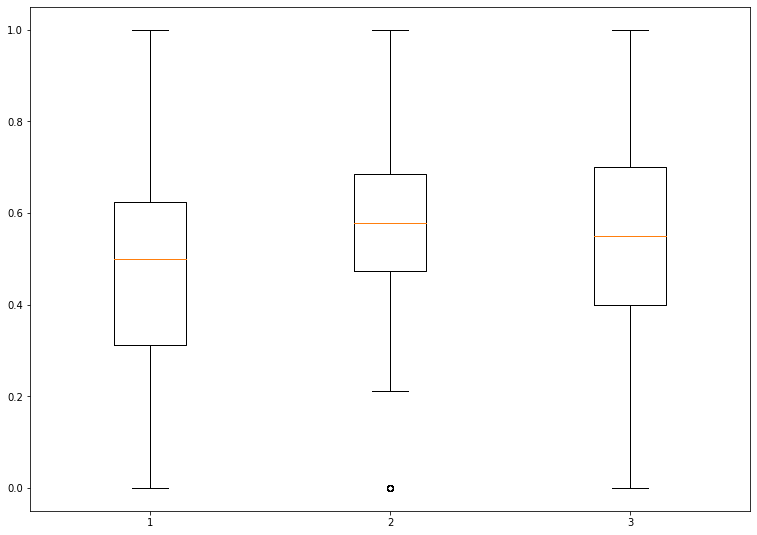

In [ ]:
import matplotlib.pyplot as plt

g1_school=df['G1']
g2_school=df['G2']
g3_school=df['G3']
data = [g1_school,g2_school,g3_school]
# Creating axes instance
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
plt.boxplot(data)
# show plot
plt.show()

# **box plot and its five number summary **
g1 - 
median is around 0.5 
max is 1
min is 0
g2 -
median is around 0.6
max is less than 1 greater than 0.9
min is 0.2
g3 -
median is around 0.6 
max is 1
min is 0

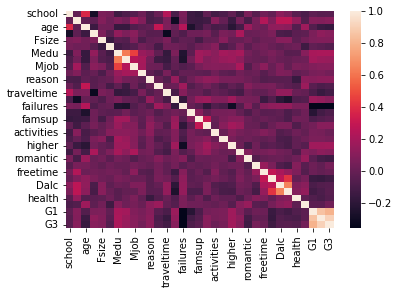

In [ ]:
import seaborn as sb
dataplot=sb.heatmap(df.corr())
plt.show()

In [ ]:
col=['school','G1','G2','G3','health','failures','traveltime']
sb.pairplot(df[col],hue="school")

inference :

> Indented block



---



---


 when failures are less grades are more 

---


 g1 ,g2 , g3 are related to each other 

---


 when travel time increases grades decreses but when its in limit then grades remain the same 

---



In [ ]:
import plotly.figure_factory as ff
x1 = df['G1']
x2 = df['G2']
x3 = df['G3']

group_labels = ['g1', 'g2 ','g3']

colors = ['slategray', 'magenta','green']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([x1, x2,x3], group_labels, bin_size=.5,
                         curve_type='normal', # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [ ]:

# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x = "traveltime", y = "age",kind = "scatter", data = df)
# show the plot
plt.show()
  

In [ ]:
sb.stripplot(x="Dalc", y="Walc", data=df)
  
plt.show()

In [ ]:
num_var = df['health']
num_var = pd.Series(num_var, name = "health")
 
# Plot histogram
sns.histplot(data = num_var, kde = True,stat = "probability")

In [ ]:

fig = plt.figure(figsize=(10, 5))
g2=df['G2']
g1=df['G1']
# creating the bar plot
plt.barh(g2,g1, color='maroon')
  
plt.xlabel("G2")
plt.ylabel("G1")
plt.title("G1 VS g2")
plt.show()

# **KNN** 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df.info()

In [ ]:
#Extracting Independent and dependent Variable  
x= df.iloc[:, [30,32]].values  
y= df.iloc[:, 0].values  
  
# Splitting the dataset into training and test set.  
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size= 0.25, random_state=0)


In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [ ]:
import math
math.sqrt(len(Y_test))

When p =1, Minkowski = Manhattan

When p =2 , Minkowski = Euclidean

When p =3 , Minkowski = Chebyshev

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=3,p=2) 
classifier.fit(X_train, Y_train)   

In [ ]:
classifier2= KNeighborsClassifier(n_neighbors=3,p=1) 
classifier2.fit(X_train, Y_train)   
 


In [ ]:
classifier3= KNeighborsClassifier(n_neighbors=3,p=3) 
classifier3.fit(X_train, Y_train)  

In [ ]:
print("{}".format(classifier))
print("{}".format(classifier2))
print("{}".format(classifier3))

In [ ]:
#Predicting the test set result  
Y_pred= classifier.predict(X_test) 
Y_pred2= classifier2.predict(X_test) 
Y_pred3= classifier3.predict(X_test) 

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  
cm2= confusion_matrix(Y_test, Y_pred2)  
cm3= confusion_matrix(Y_test, Y_pred3) 

In [ ]:
cm3

In [ ]:
cm2

In [ ]:
cm

COnfusion matrix have 7% wrongly predicted 
92% correctly predicted accuracy

In [ ]:
acc=accuracy_score(Y_test, Y_pred)
acc

In [ ]:
cl=classification_report(Y_test, Y_pred)

In [ ]:
cl

In [ ]:
from matplotlib.colors import ListedColormap  
import numpy as nm  
import matplotlib.pyplot as mtp 
x_set, y_set = X_train, Y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  = 0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
    c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('K-NN Algorithm (Training set)')  
mtp.xlabel('g score')  
mtp.ylabel('')  
mtp.legend() 
mtp.show()                                      


In [ ]:
#Extracting Independent and dependent Variable  
x1= df.iloc[:, [32,31]].values  
y1= df.iloc[:, 0].values  
  
# Splitting the dataset into training and test set.  
X_train1, X_test1, Y_train1, Y_test1= train_test_split(x1, y1, test_size= 0.25, random_state=0)
sc_X=StandardScaler()
X_train1=sc_X.fit_transform(X_train1)
X_test1=sc_X.fit_transform(X_test1)

In [ ]:
from sklearn.naive_bayes import GaussianNB  
clas = GaussianNB()  
clas.fit(X_train1, Y_train1)

In [ ]:
    # Predicting the Test set results  
y_pred1 = clas.predict(X_test1)  

In [ ]:
    # Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(Y_test1, y_pred1)  
cm

In [ ]:
    # Visualising the Training set results  
import matplotlib.pyplot as mtp  
import numpy as nm  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_train1, Y_train
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
   mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('g1 score')  
mtp.ylabel('G score')  
mtp.legend()  
mtp.show()  

In [ ]:
    # Visualising the Training set results  
import matplotlib.pyplot as mtp  
import numpy as nm  
from matplotlib.colors import ListedColormap  
x_set, y_set = X_test, Y_test
X1, X2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(X1, X2, classifier.predict(nm.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('purple', 'green')))  
mtp.xlim(X1.min(), X1.max())  
mtp.ylim(X2.min(), X2.max())  
for i, j in enumerate(nm.unique(y_set)):  
   mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Naive Bayes (Training set)')  
mtp.xlabel('G1 score')  
mtp.ylabel('G2 score')  
mtp.legend()  
mtp.show()  

#  Clustering 
# kmeans clustering 

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
x = df.iloc[:, [30,31]].values  


In [ ]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 7):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 7), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 0)  
y_predict= kmeans.fit_predict(x)  


# optimal no of clusters 3

In [ ]:
y_predict

In [ ]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster 
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clustering')  
mtp.xlabel('G1 score')  
mtp.ylabel('G2 Score')  
mtp.legend()  
mtp.show() 

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 0)  
y_predict= kmeans.fit_predict(x)  
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clustering')  
mtp.xlabel('G1 score')  
mtp.ylabel('G2 Score')  
mtp.legend()  
mtp.show() 

As G1 increases then G2 also increases 

---
green - need to improve student 

---


blue - average student 

---


red - good and best students


---



# Hierarchical clustering 

In [ ]:
df.info()

In [ ]:
x = df.iloc[:, [31, 32]].values  

In [ ]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()  

In [ ]:
#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

In [ ]:
#visulaizing the clusters  
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.title('Clusters of customers')  
mtp.xlabel('G2')  
mtp.ylabel('g3')  
mtp.legend()  
mtp.show()  

In [ ]:
df.head()

NameError: ignored

#Decision tree

In [ ]:
import pandas as pd

df=pd.read_csv("/content/student-mat.csv",delimiter=';')
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

cols = ['address','famsize','school', 'sex','Mjob','Fjob','schoolsup','famsup','paid','Pstatus','guardian','reason','activities','nursery','higher','internet','romantic']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['school']=labelencoder.fit_transform(df['school'])
df.head(1)
x= df.iloc[:, 0:29].values  
y= df.iloc[:, 30].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
import numpy as nm
#features = nm.array([[4,5]])
features = nm.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0) 

# using inputs to predict the output
classifier.fit(x_train, y_train)  
prediction = classifier.predict(features)

print("G1 score: {}".format(prediction))

G1 score: [8]


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  paid        395 non-null    int64
 18  activities  395 non-null    int64
 19  nursery     395 non-null    int64
 20  higher      395 non-null    int6

#linear regression

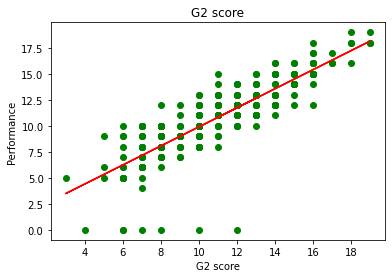

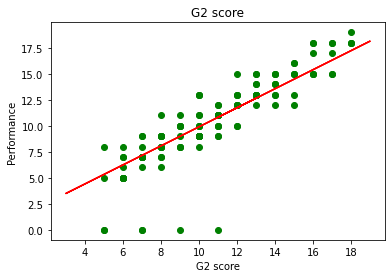

In [ ]:
import pandas as pd


df=pd.read_csv("/content/student-mat.csv",delimiter=';')
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

cols = ['address','famsize','school', 'sex','Mjob','Fjob','schoolsup','famsup','paid','Pstatus','guardian','reason','activities','nursery','higher','internet','romantic']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['school']=labelencoder.fit_transform(df['school'])
df.head(1)
x= df.iloc[:,[30]].values  
y= df.iloc[:,[31]].values  

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  
x.shape
y.shape
import numpy as nm  
import matplotlib.pyplot as mtp  

mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("G2 score")  
mtp.xlabel("G2 score")  
mtp.ylabel("Performance")  
mtp.show()
import numpy as nm  
import matplotlib.pyplot as mtp  

mtp.scatter(x_test, y_test, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("G2 score")  
mtp.xlabel("G2 score")  
mtp.ylabel("Performance")  
mtp.show()
 

In [ ]:
"""import pandas as pd


df=pd.read_csv("/content/student-mat.csv",delimiter=';')
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

cols = ['address','famsize','school', 'sex','Mjob','Fjob','schoolsup','famsup','paid','Pstatus','guardian','reason','activities','nursery','higher','internet','romantic']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['school']=labelencoder.fit_transform(df['school'])
df.head(1)
x= df.iloc[:,[30,31]].values  
y= df.iloc[:,[32]].values  

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 
#Prediction of Test and Training set result  
y_pred= regressor.predict(x_test)  
x_pred= regressor.predict(x_train)  
x.shape
y.shape
import numpy as nm  
import matplotlib.pyplot as mtp  

mtp.scatter(x_train, y_train, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("G2 score")  
mtp.xlabel("G2 score")  
mtp.ylabel("Performance")  
mtp.show()
import numpy as nm  
import matplotlib.pyplot as mtp  

mtp.scatter(x_test, y_test, color="green")   
mtp.plot(x_train, x_pred, color="red")    
mtp.title("G2 score")  
mtp.xlabel("G2 score")  
mtp.ylabel("Performance")  
mtp.show()"""

'import pandas as pd\n\n\ndf=pd.read_csv("/content/student-mat.csv",delimiter=\';\')\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder=LabelEncoder()\n\ncols = [\'address\',\'famsize\',\'school\', \'sex\',\'Mjob\',\'Fjob\',\'schoolsup\',\'famsup\',\'paid\',\'Pstatus\',\'guardian\',\'reason\',\'activities\',\'nursery\',\'higher\',\'internet\',\'romantic\']\ndf[cols] = df[cols].apply(LabelEncoder().fit_transform)\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder=LabelEncoder()\ndf[\'school\']=labelencoder.fit_transform(df[\'school\'])\ndf.head(1)\nx= df.iloc[:,[30,31]].values  \ny= df.iloc[:,[32]].values  \n\n# Splitting the dataset into training and test set.  \nfrom sklearn.model_selection import train_test_split  \nx_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)  \n#Fitting the Simple Linear Regression model to the training dataset  \nfrom sklearn.linear_model import LinearRegression  \nregressor= LinearRegression()  \nr